In [1]:
import torch
torch.cuda.is_available()



True

In [2]:
from ultralytics import YOLO
import os
import numpy as np
import cv2


In [3]:
#model = YOLO("D:/Code/Model_YOLO_Detection/runs/detect/train6/weights/best.pt") 
#results = model.train(
#   data='D:/Code/Model_YOLO_Detection/data_detection/data.yaml',
#   imgsz=640,
#   epochs=10,
#   batch=-1,
#   device = 0,
#   patience = 50)


image 1/1 D:\Code\Rusty_car_bodywork_rusted_through_in_BMW_318i_E46_-_free_stock_photo_with_attribution_CC-BY.jpg: 448x640 1 0, 51.9ms
Speed: 4.0ms preprocess, 51.9ms inference, 119.9ms postprocess per image at shape (1, 3, 448, 640)


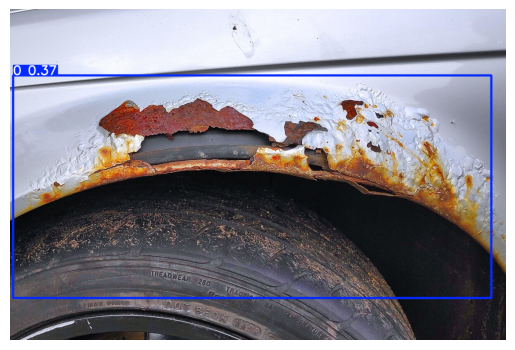

In [4]:
import matplotlib.pyplot as plt
import cv2   

model = YOLO("D:/Code/Model_YOLO_Detection/runs/detect/train7/weights/best.pt")

results = model('D:/Code/Rusty_car_bodywork_rusted_through_in_BMW_318i_E46_-_free_stock_photo_with_attribution_CC-BY.jpg')

plot_img = results[0].plot()

plot_img = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)

plt.imshow(plot_img)
plt.axis('off') 
plt.show()



In [ ]:

image_path = results[0].path  
image_shape = results[0].orig_shape  
detections_count = len(results[0].boxes)  
times = results[0].speed  

# Сохранение данных в переменную
processing_data = {
    "image_path": image_path,
    "image_shape": image_shape,
    "detections_count": detections_count,
    "speed": {
        "preprocess": round(times["preprocess"], 1),
        "inference": round(times["inference"], 1),
        "postprocess": round(times["postprocess"], 1),
    }
}


{'image_path': 'D:\\Code\\Rusty_car_bodywork_rusted_through_in_BMW_318i_E46_-_free_stock_photo_with_attribution_CC-BY.jpg',
 'image_shape': (800, 1200),
 'detections_count': 1,
 'speed': {'preprocess': 4.0, 'inference': 51.9, 'postprocess': 119.9}}

In [ ]:

import psycopg2



db_config = {
    "dbname": "info_Corrosia",
    "user": "postgres",
    "password": "Devid123",
    "host": "localhost",  
    "port": 5432          
}

try:
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

    # SQL-запрос для вставки данных
    insert_query = """
    INSERT INTO info_results (
        image_path, 
        image_width, 
        image_height, 
        detections_count, 
        preprocess_time, 
        inference_time, 
        postprocess_time
    ) VALUES (%s, %s, %s, %s, %s, %s, %s);
    """

    # Подготовка данных для вставки
    data_to_insert = (
        processing_data["image_path"],
        processing_data["image_shape"][1],  # Ширина изображения
        processing_data["image_shape"][0],  # Высота изображения
        processing_data["detections_count"],
        processing_data["speed"]["preprocess"],
        processing_data["speed"]["inference"],
        processing_data["speed"]["postprocess"],
    )

    # Выполнение запроса
    cursor.execute(insert_query, data_to_insert)

    # Фиксация изменений
    conn.commit()
    print("Данные успешно добавлены в таблицу.")

except Exception as e:
    print("Ошибка при работе с базой данных:", e)

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()

Данные успешно добавлены в таблицу.
